## Capstone- Cancer Histopathology: Evaluate Results

Dataset:
- A. Borkowski, "Lung and Colon Cancer Histopathological Images", Kaggle.com, 2020. [Online]. Available: https://www.kaggle.com/datasets/andrewmvd/lung-and-colon-cancer-histopathological-images. [Accessed: 30- Jul- 2022].

Sources:
- Borkowski AA, Bui MM, Thomas LB, Wilson CP, DeLand LA, Mastorides SM. Lung and Colon Cancer Histopathological Image Dataset (LC25000). arXiv:1912.12142v1 [eess.IV], 2019

Image Labels:
- Lung benign tissue: 3
- Lung adenocarcinoma: 2
- Lung squamous cell carcinoma: 4
- Colon adenocarcinoma: 0
- Colon benign tissue: 1

### Import Libraries

In [1]:
## Import Libraries
import numpy as np
import pandas as pd
import re as regex
from pathlib import Path
import time
import math

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report

import string
from collections import Counter

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

# import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Load Data

In [2]:
import PIL
from PIL import Image
import glob
import os, os.path
from numpy import asarray

import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from IPython.display import display, HTML
import pymongo
from pymongo import MongoClient
import io
from bson.binary import Binary

In [3]:
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Model, Sequential
from keras.applications.xception import Xception
from keras.applications import *
from keras.callbacks import EarlyStopping
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from keras.applications.mobilenet import MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from keras.layers import BatchNormalization
from keras.models import load_model

In [4]:
%%time
dfShuffledData= pd.DataFrame(np.load('shufGenData96.npy', allow_pickle= True),
                             columns=['imageVector', 'label', 'classLabel', 'image', 'labelName'])
dfShuffledData.head()

CPU times: total: 3.69 s
Wall time: 30.1 s


,imageVector,label,classLabel,image,labelName
0,"[[[0.9960785, 0.98823535, 0.9921569], [0.98823...","[1.0, 0.0, 0.0, 0.0, 0.0]",0,<PIL.Image.Image image mode=RGB size=96x96 at ...,colon_aca
1,"[[[0.98823535, 0.97647065, 0.9568628], [0.8470...","[1.0, 0.0, 0.0, 0.0, 0.0]",0,<PIL.Image.Image image mode=RGB size=96x96 at ...,colon_aca
2,"[[[0.79215693, 0.6745098, 0.96470594], [0.7647...","[0.0, 0.0, 1.0, 0.0, 0.0]",2,<PIL.Image.Image image mode=RGB size=96x96 at ...,lung_aca
3,"[[[0.83921576, 0.5647059, 0.7686275], [0.85882...","[0.0, 0.0, 0.0, 1.0, 0.0]",3,<PIL.Image.Image image mode=RGB size=96x96 at ...,lung_n
4,"[[[0.40000004, 0.21176472, 0.7411765], [0.1647...","[0.0, 0.0, 0.0, 0.0, 1.0]",4,<PIL.Image.Image image mode=RGB size=96x96 at ...,lung_scc


In [5]:
def originSize(image):
    imgVect= image * 255.0
    return imgVect

In [6]:
%%time
dfShuffledData['originSize']= dfShuffledData['imageVector'].apply(originSize)

CPU times: total: 56.5 s
Wall time: 56.5 s


In [7]:
dfShuffledData.head()

,imageVector,label,classLabel,image,labelName,originSize
0,"[[[0.9960785, 0.98823535, 0.9921569], [0.98823...","[1.0, 0.0, 0.0, 0.0, 0.0]",0,<PIL.Image.Image image mode=RGB size=96x96 at ...,colon_aca,"[[[254.00002, 252.00002, 253.00002], [252.0000..."
1,"[[[0.98823535, 0.97647065, 0.9568628], [0.8470...","[1.0, 0.0, 0.0, 0.0, 0.0]",0,<PIL.Image.Image image mode=RGB size=96x96 at ...,colon_aca,"[[[252.00002, 249.00002, 244.00002], [216.0000..."
2,"[[[0.79215693, 0.6745098, 0.96470594], [0.7647...","[0.0, 0.0, 1.0, 0.0, 0.0]",2,<PIL.Image.Image image mode=RGB size=96x96 at ...,lung_aca,"[[[202.00002, 172.0, 246.00002], [195.00002, 1..."
3,"[[[0.83921576, 0.5647059, 0.7686275], [0.85882...","[0.0, 0.0, 0.0, 1.0, 0.0]",3,<PIL.Image.Image image mode=RGB size=96x96 at ...,lung_n,"[[[214.00002, 144.0, 196.00002], [219.00002, 1..."
4,"[[[0.40000004, 0.21176472, 0.7411765], [0.1647...","[0.0, 0.0, 0.0, 0.0, 1.0]",4,<PIL.Image.Image image mode=RGB size=96x96 at ...,lung_scc,"[[[102.00001, 54.000004, 189.0], [42.0, 0.0, 1..."


In [8]:
%%time
imgVectData= np.array(dfShuffledData['originSize'].tolist())
imgVectData.shape

CPU times: total: 1.92 s
Wall time: 2 s


(25000, 96, 96, 3)

In [9]:
%%time
imgVectData01= np.array(dfShuffledData['imageVector'].tolist())
imgVectData01.shape

CPU times: total: 4.73 s
Wall time: 11 s


(25000, 96, 96, 3)

In [10]:
labelData01= np.array(dfShuffledData['label'].tolist())
labelData01.shape

(25000, 5)

### Prepare data

In [11]:
# Prepare input data
X= imgVectData
X2= imgVectData01

# output
y= labelData01.astype(np.uint8)

In [12]:
%%time
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 65)
X2_train, X2_test, y2_train, y2_test= train_test_split(X2, y, test_size= 0.3, random_state= 65)

CPU times: total: 28.4 s
Wall time: 7min 24s


In [27]:
filter= []
# run in blocks of 10
for i in range(len(y) // 10):
    s= set()
    while len(s) < 2:
        s= set(np.random.randint(0, 10, 2, dtype = np.int8))
    a= [x in s for x in range(10)]
    filter.append(a)
test= np.array(filter).flatten()
train= np.array([not t for t in test])

In [31]:
test

array([False, False, False, ..., False, False,  True])

In [56]:
X3_train= X2[train].copy()
X3_test= X2[test].copy()
y3_train= y[train].copy()
y3_test= y[test].copy()

In [13]:
X_train.shape

(17500, 96, 96, 3)

In [14]:
X_test.shape

(7500, 96, 96, 3)

In [15]:
y_train.shape

(17500, 5)

In [16]:
modelTag= ['cnnMk01', 'cnnMk02', 'cnnMk03', 'cnnMk04', 'cnnMk05', 'cnnMk06',
           'VGG16', 'VGG19', 'Xception', 'InceptionV3']
imageTag= []
for i in range(31, 45):
    if (i <= 9):
        img= f'image0{i}'
        imageTag.append(img)
    else:
        img= f'image{i}'
        imageTag.append(img)
imageTag

['image31',
 'image32',
 'image33',
 'image34',
 'image35',
 'image36',
 'image37',
 'image38',
 'image39',
 'image40',
 'image41',
 'image42',
 'image43',
 'image44']

### Create Predictions

In [17]:
cnnMk06= load_model('cnnMkMod06.h5')

In [18]:
def predictClass(model, xtest):
    predict_x= model.predict(xtest)
    classes_x= predict_x.argmax(axis= 1)
    return classes_x

In [19]:
def evalModel(model, xtest, ytest):
    tic01= time.time()
    evalScore= model.evaluate(xtest, ytest, batch_size= 10)
    print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(evalScore))
    toc01= time.time()
    evalRunTime= (toc01-tic01)*1000
    return [evalScore, evalRunTime]

In [20]:
def print_cm(cm):
    d_size= max(len('%d' % cm.max()), len('%d' % cm.shape[1]))
    if min(cm.shape) > 10: # make sparse
        print('Sparse Matrix (*=diagonal)')
        fmt_r= 'r%%0%dd' % d_size
        fmt_c= ', c%%0%dd%%s= %%%dd' % (d_size, d_size)
        for i in range(cm.shape[0]):
            s= fmt_r % i
            for j in range(cm.shape[1]):
                if cm[i, j] > 0:
                    s += fmt_c % (j, '*' if i == j else ' ', cm[i, j])
            print(s)
    else: # make dense
        c= '%%%dd ' % d_size
        s= '%s| ' % (' ' * d_size)
        s += ''.join([c % i for i in range(len(cm[0]))])
        print(s)
        print('-' * len(s))
        for i, r in enumerate(cm):
            s= '%2d| ' % i
            s += c * len(r)
            print(s % tuple(r))

In [58]:
def confuseMatrix(ytest, classes_x, modelTag, imageTag):
    y_test_target= np.array([x.argmax() for x in ytest])
    cm= confusion_matrix(y_test_target, classes_x)
    print_cm(cm)
    
    confuseLabels= ('colon_aca', 'colon_n', 'lung_aca', 'lung_n', 'lung_scc')
    # plot
    fig, ax = plt.subplots(1, 1, figsize = (8, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)
    # Confusion Matrix
    sns.heatmap(cm, square= True, annot= True, fmt= 'd', cbar= False, cmap= 'Blues', ax= ax,
               xticklabels= confuseLabels, yticklabels= confuseLabels)

    ax.set_title(f'Confusion Matrix ({modelTag})')
    ax.set_xlabel('True label')
    ax.set_ylabel('Predicted label')

    plt.savefig(f'{imageTag}.png', facecolor='w', bbox_inches="tight",
            pad_inches=0.3, transparent=True)

    plt.show()
    return [y_test_target, cm]

In [22]:
def kfoldCrossVal(model, xData, yData, xTrain, yTrain):
    # define 5-fold cross validation test harness
    kfold= KFold(n_splits= 5)
    cvScores= []
    for train, test in kfold.split(xTrain, yTrain):
    #     print(X[train].shape, y[train].shape)
        scores= model.evaluate(xData[train], yData[train], batch_size= 10, verbose= 1)
        print("%s: %.4f" % (model.metrics_names[1], scores[1]))
        cvScores.append(scores[1])
    meanAcc= np.mean(cvScores)
    print(cvScores, meanAcc)
    print("%.4f (+/- %.4f)" % (np.mean(cvScores), np.std(cvScores)))
    return [cvScores, meanAcc]

In [23]:
def classReport(yTestTarget, classes_x):
    classReport= classification_report(yTestTarget, classes_x)
    classReportDict= classification_report(yTestTarget, classes_x, output_dict= True)
    print(classReport)
    return [classReportDict]

In [24]:
def modelArray(evalScore, classReportDict, evalRunTime, meanAcc):
    arr01= []
    arr01.append(evalScore)
    for i in classReportDict['macro avg']:
#         print(i)
        classMetric= classReportDict['macro avg'][i]
        arr01.append(classMetric)

#     arr01.append(modelTag)
    arr01.append(evalRunTime)
    arr01.append(meanAcc)
    print(arr01)
    return arr01

In [25]:
def modelSummary(model, X, y, xTrain, yTrain, xTest, yTest, modelTag, imageTag):
    predictX= predictClass(model, xTest)
    evalMod= evalModel(model, xTest, yTest)
    confuseMatrixMod= confuseMatrix(yTest, predictX, modelTag, imageTag)
    classReportMod= classReport(confuseMatrixMod[0], predictX)
    kfoldCrossValMod= kfoldCrossVal(model, X, y, xTrain, yTrain)
    modelArr= modelArray(evalMod[0][1], classReportMod[0], evalMod[1], kfoldCrossValMod[1])
    return modelArr

### cnnMk06 Summary

500/500 [==============================] - 26s 51ms/step - loss: 0.1072 - accuracy: 0.9582

Test loss: 0.107223, Test accuracy: 0.958200
   |   0   1   2   3   4 
-------------------------
 0| 938  39   0   0   0 
 1|  22 997   0   0   0 
 2|  15   0 918   1  88 
 3|   1   0   8 996   0 
 4|   1   0  34   0 942 


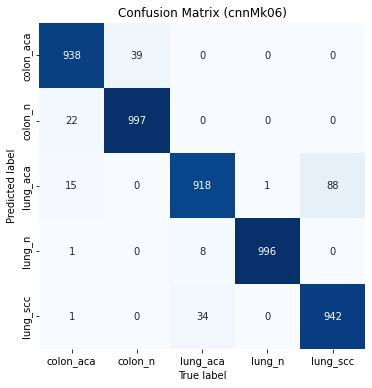

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       977
           1       0.96      0.98      0.97      1019
           2       0.96      0.90      0.93      1022
           3       1.00      0.99      1.00      1005
           4       0.91      0.96      0.94       977

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000

1600/1600 [==============================] - 114s 71ms/step - loss: 0.1119 - accuracy: 0.9561
accuracy: 0.9561
1600/1600 [==============================] - 101s 63ms/step - loss: 0.1121 - accuracy: 0.9553
accuracy: 0.9553
1600/1600 [==============================] - 131s 81ms/step - loss: 0.1103 - accuracy: 0.9571
accuracy: 0.9571
1600/1600 [==============================] - 144s 90ms/step - loss: 0.1111 - accuracy: 0.9564
accuracy: 0.9564
1600/1600 [==============================] - 115s 72ms/step - loss:

In [59]:
cnnMk06Summary= modelSummary(cnnMk06, X2, y, X3_train, y3_train, X3_test, y3_test,
                             modelTag[5], imageTag[5])

### Results

In [60]:
cnnMk06PredictX= predictClass(cnnMk06, X3_test)

157/157 [==============================] - 20s 127ms/step


In [73]:
def implot2(im1, im2, id):
    t1 = y3_test[id].argmax()
    t2 = cnnMk06PredictX[id]

    fig, ax = plt.subplots(1, 2, figsize = (6, 3))
    fig.subplots_adjust(left = 0.02, right = 0.98, top = 0.85, wspace = 0.2)
    fig.suptitle('Prediction %d' % id, fontsize = 12, fontweight = 'bold')

    plt.rcParams.update({'font.size': 10})

    # original image
    ax[0].imshow(im1, cmap = 'gray')
    ax[0].set_title('Original id: %d' % t1)
    ax[0].set_xticks([])
    ax[0].set_yticks([])

    # convoluted image
    ax[1].imshow(im2, cmap = 'gray')
    ax[1].set_title('Test id: %d' % t2)
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    plt.savefig(f'{id}.png', facecolor='w', bbox_inches="tight",
            pad_inches=0.3, transparent=True)
    plt.show()

In [68]:
def pick_test_image(pid):
    # pick the prediction
    ppid = cnnMk06PredictX[pid]
    # find the corresponding image
    j = -1
    for ipid in range(test.shape[0]):
        if test[ipid]:
            j += 1
        if j == pid:
            break
    return X2[ipid]

In [69]:
def pick_train_image(ppid):
    oid = np.array([a.argmax() == ppid for a in y3_train]).argmax()
    poid = y3_train[oid].argmax()
    j = -1
    for ioid in range(train.shape[0]):
        if train[ioid]:
            j += 1
        if j == oid:
            break
    return X2[ioid]

In [70]:
def compare_images(id):
    XTest = pick_test_image(id)
    XTrain = pick_train_image(cnnMk06PredictX[id])
    implot2(XTrain, XTest, id)

4787


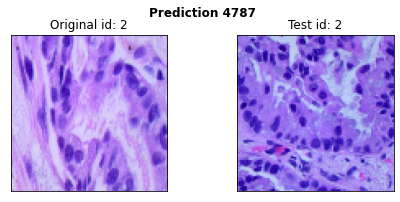

In [74]:
id = np.random.randint(len(cnnMk06PredictX))
print(id)
compare_images(id)

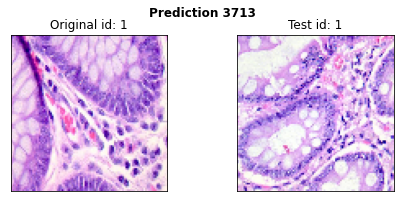

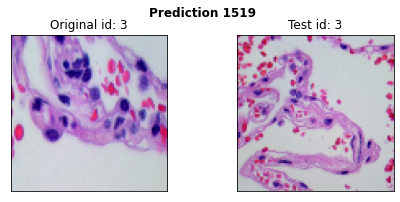

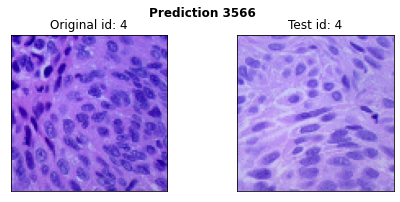

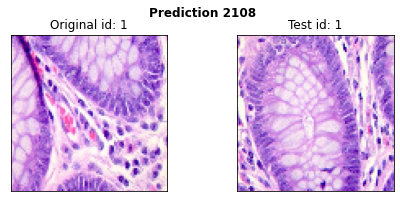

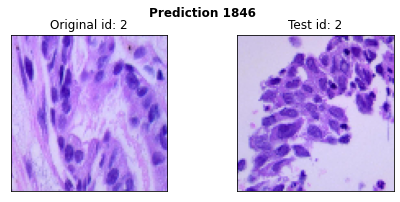

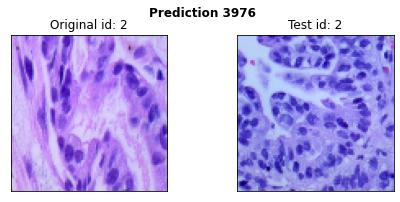

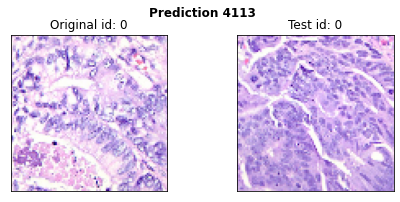

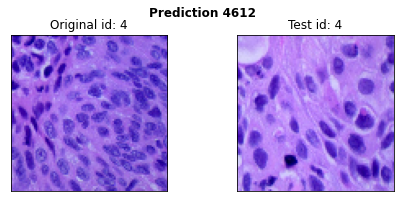

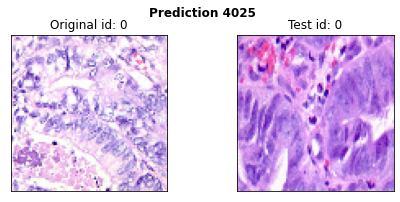

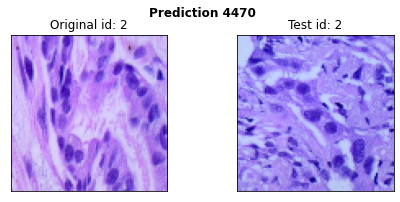

In [75]:
ids = np.random.randint(len(cnnMk06PredictX), size = 10)
for id in ids:
    compare_images(id)